In [34]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading Data: Load the Titanic dataset.

In [35]:
# Load dataset
data = pd.read_csv("C:/Users/janha/Downloads/archive (12)/Titanic-Dataset.csv")

In [36]:
# Display the first few rows of the dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Handling Missing Values: 

Fill missing values for Age with the median, and Embarked with the mode. The Cabin column has too many missing values, so it is dropped.

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


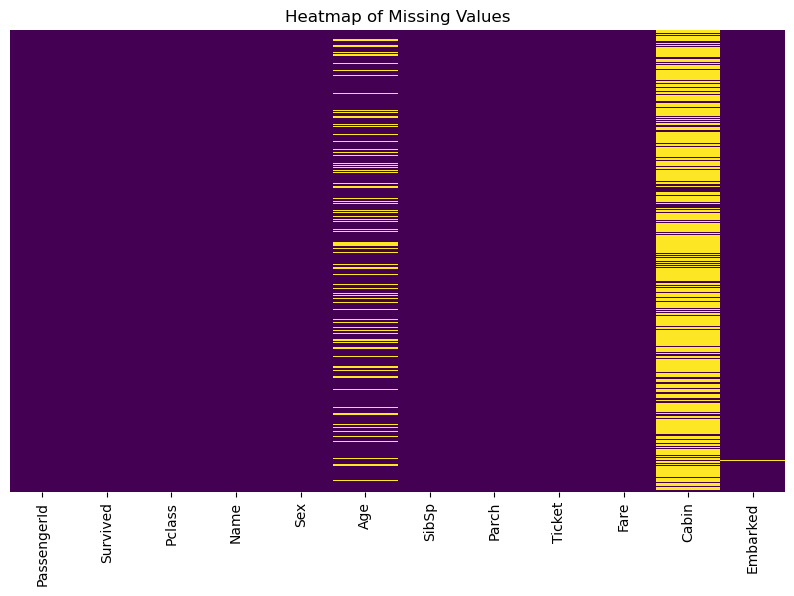

In [37]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

Percentage of missing values in each column:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


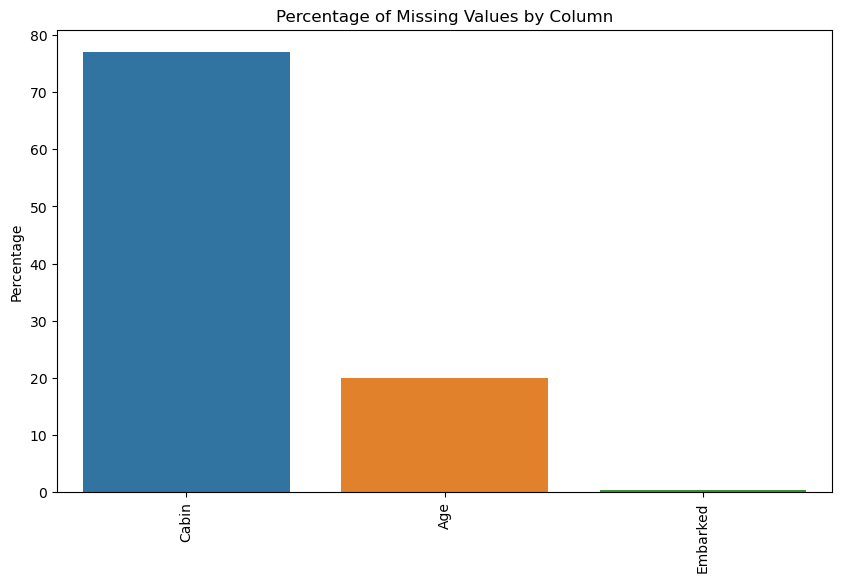

In [38]:
# Percentage of missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Percentage of missing values in each column:\n", missing_percentage)

# Bar plot of missing values
missing_data = missing_values[missing_values > 0].sort_values(ascending=False)
missing_percentage_data = (missing_data / len(data)) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage_data.index, y=missing_percentage_data.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.show()

In [ ]:
# Fill 'Age' with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to too many missing values
data.drop('Cabin', axis=1, inplace=True)

# Check again for missing values
print("Missing values after handling:\n", data.isnull().sum())

# EDA:

Insights:

Pclass: First-class passengers (Pclass = 1) had higher survival rates.

Sex: Women were more likely to survive.

Age: Younger passengers (children) were more likely to survive.

Embarked: Passengers who embarked from Cherbourg (C) had higher survival rates.

Fare: Higher fare passengers generally had a better chance of survival.


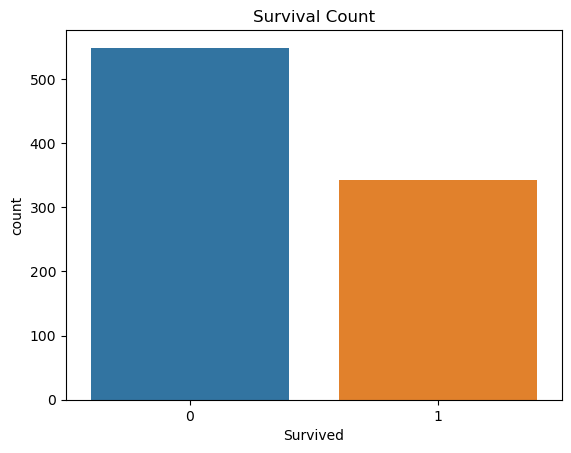

In [48]:
# 1. Distribution of survived passengers
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

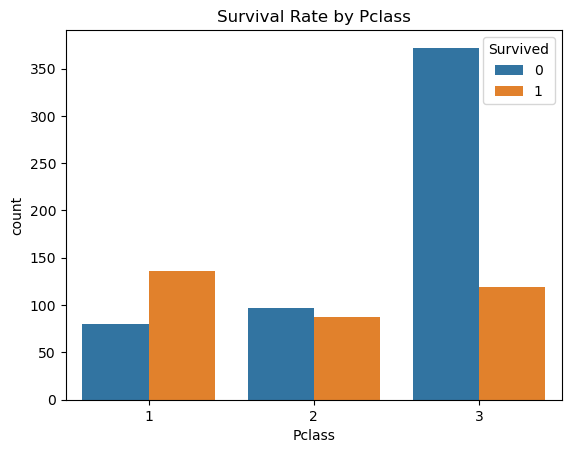

In [49]:
# 2. Survival rate by Pclass (Socio-economic status)
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Rate by Pclass')
plt.show()

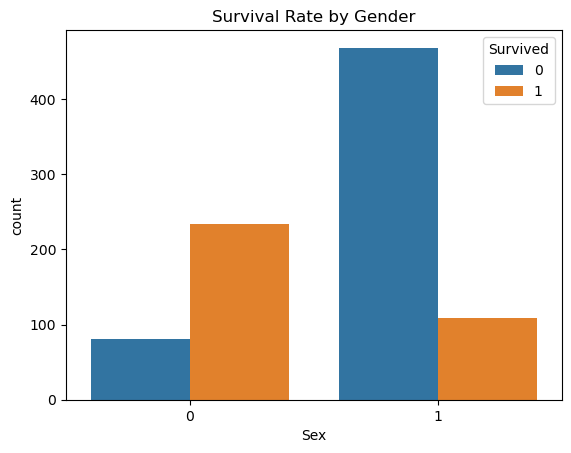

In [50]:
# 3. Survival rate by Gender
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

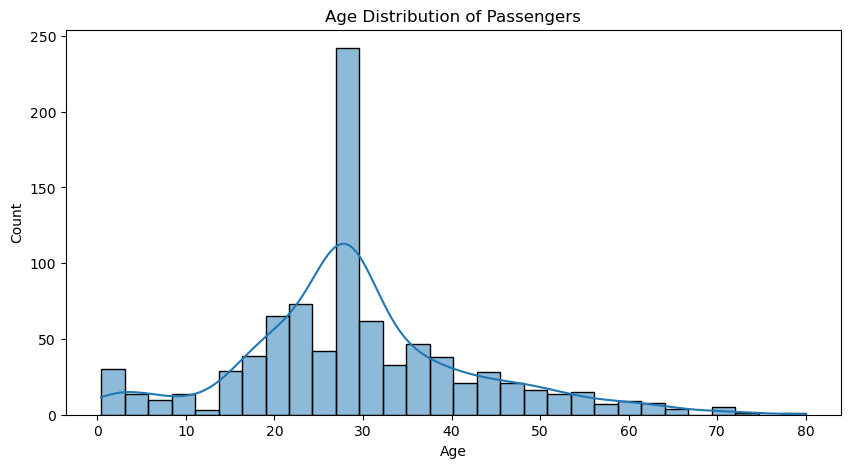

In [51]:
# 4. Age distribution of passengers with KDE plot
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

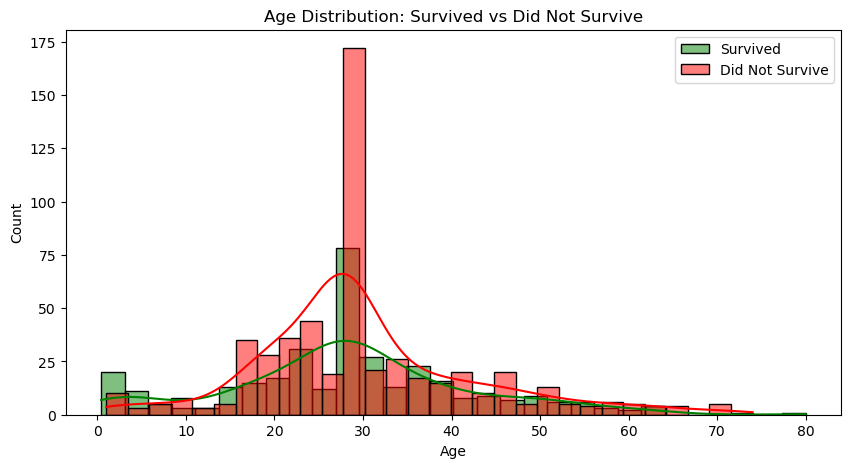

In [52]:
# 5. Survival rate by Age
plt.figure(figsize=(10, 5))
sns.histplot(data[data['Survived'] == 1]['Age'], color='green', kde=True, label='Survived', bins=30)
sns.histplot(data[data['Survived'] == 0]['Age'], color='red', kde=True, label='Did Not Survive', bins=30)
plt.title('Age Distribution: Survived vs Did Not Survive')
plt.legend()
plt.show()

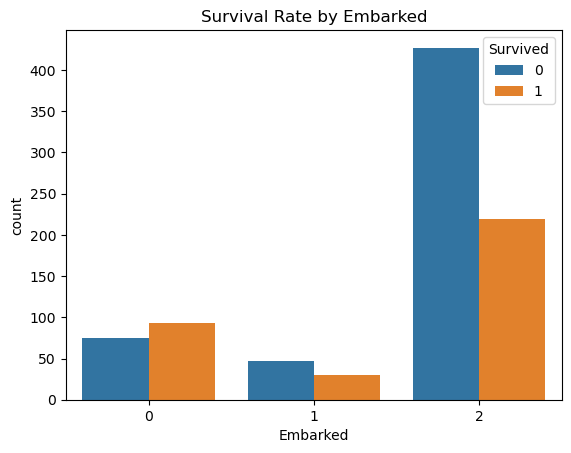

In [53]:
# 6. Survival rate by Embarked
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival Rate by Embarked')
plt.show()

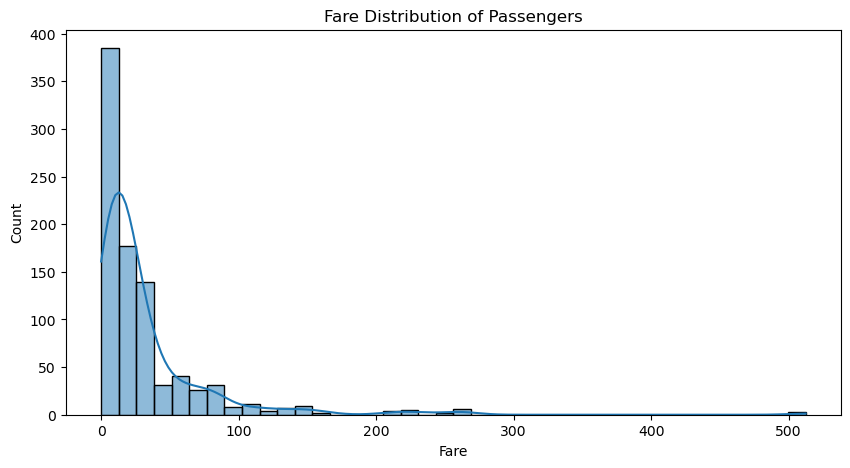

In [54]:
# 7. Fare distribution and Survival
plt.figure(figsize=(10, 5))
sns.histplot(data['Fare'], bins=40, kde=True)
plt.title('Fare Distribution of Passengers')
plt.show()

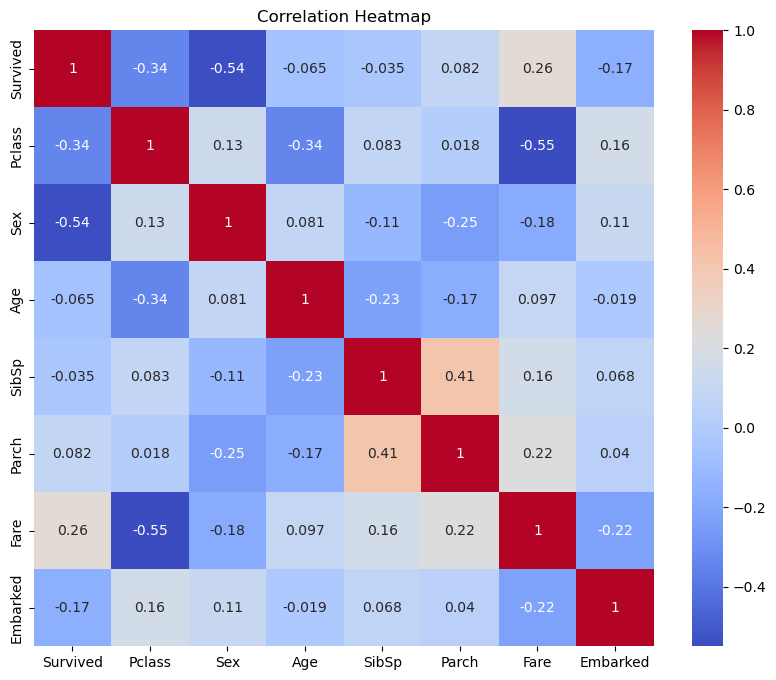

In [55]:
# 8. Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

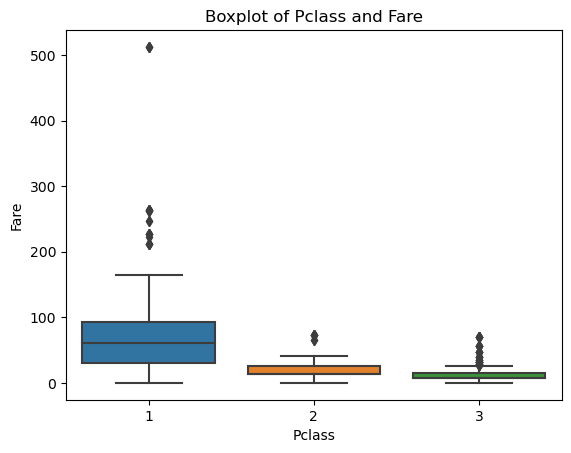

In [56]:
# 9. Boxplot for Pclass and Fare to check for outliers
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Boxplot of Pclass and Fare')
plt.show()

C:\Users\janha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


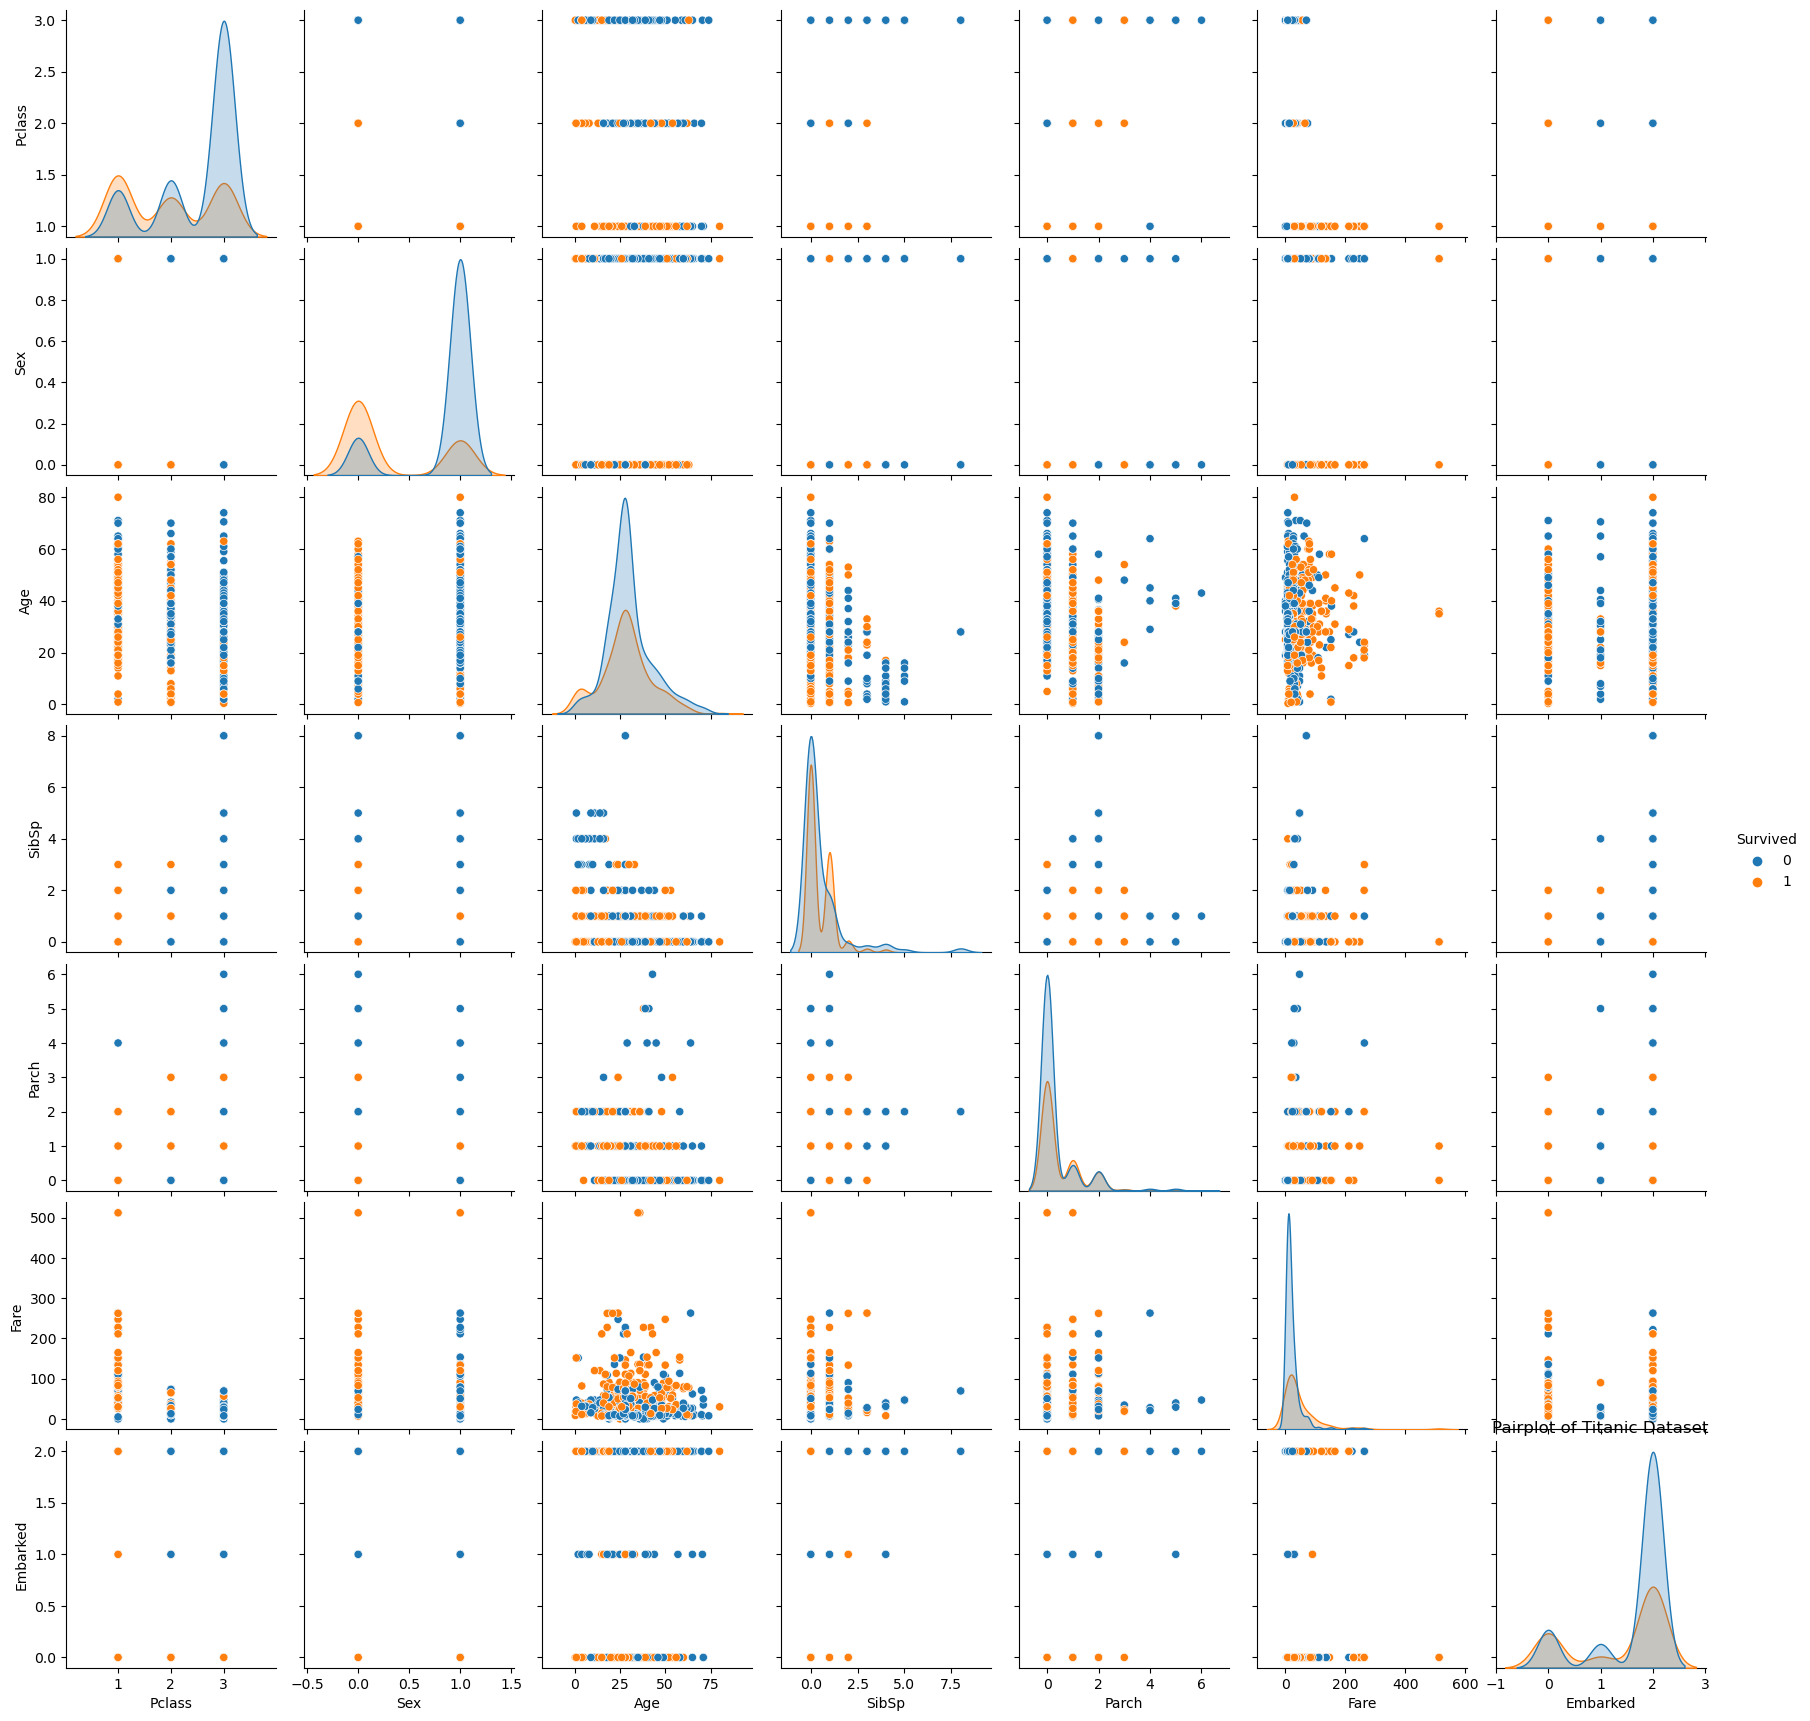

In [58]:
# 10. Pairplot to explore relationships between features
sns.pairplot(data, hue='Survived')
plt.title('Pairplot of Titanic Dataset')
plt.show()

# Feature Engineering: 

Drop irrelevant columns (PassengerId, Name, Ticket), encode categorical variables (Sex, Embarked).

In [39]:
# Drop 'PassengerId', 'Name', and 'Ticket' as they don't contribute to survival prediction
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [40]:
# Encode categorical features ('Sex' and 'Embarked')
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data['Embarked'] = label.fit_transform(data['Embarked'])

In [41]:
# Define feature set and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Train-Test Split:

Split the data into training and testing sets.

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling: 

Use RandomForestClassifier to train the model.

In [43]:
# Train a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation: 

Predict survival and evaluate the model's accuracy and other metrics.


In [44]:
# Make predictions
y_pred = model.predict(X_test)

In [45]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Feature Importance: 

Display which features (e.g., Pclass, Sex, Age) are most important for the prediction.

In [46]:
# Feature importance
importances = model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance)

    Feature  Importance
1       Sex    0.271410
5      Fare    0.265010
2       Age    0.249995
0    Pclass    0.086957
3     SibSp    0.053685
4     Parch    0.039897
6  Embarked    0.033044


# Key Features for Survival Prediction:

Pclass: Socio-economic status.

Sex: Gender.

Age: Age of the passenger.

Fare: Ticket fare.

Embarked: Port of embarkation.